Iteration 1: GDP = 131.21, Savings = 45.01, Consumption (young) = 1.88, Consumption (elderly) = 60.60
Iteration 2: GDP = 101.28, Savings = 34.51, Consumption (young) = 1.44, Consumption (elderly) = 55.01
Iteration 3: GDP = 93.20, Savings = 31.55, Consumption (young) = 1.31, Consumption (elderly) = 54.03
Iteration 4: GDP = 90.89, Savings = 30.55, Consumption (young) = 1.27, Consumption (elderly) = 53.80
Iteration 5: GDP = 90.35, Savings = 30.17, Consumption (young) = 1.26, Consumption (elderly) = 53.72
Iteration 6: GDP = 90.40, Savings = 29.97, Consumption (young) = 1.25, Consumption (elderly) = 53.68
Iteration 7: GDP = 90.63, Savings = 29.84, Consumption (young) = 1.24, Consumption (elderly) = 53.65
Iteration 8: GDP = 90.93, Savings = 29.72, Consumption (young) = 1.24, Consumption (elderly) = 53.63
Iteration 9: GDP = 91.26, Savings = 29.61, Consumption (young) = 1.23, Consumption (elderly) = 53.62
Iteration 10: GDP = 91.60, Savings = 29.50, Consumption (young) = 1.23, Consumption (elde

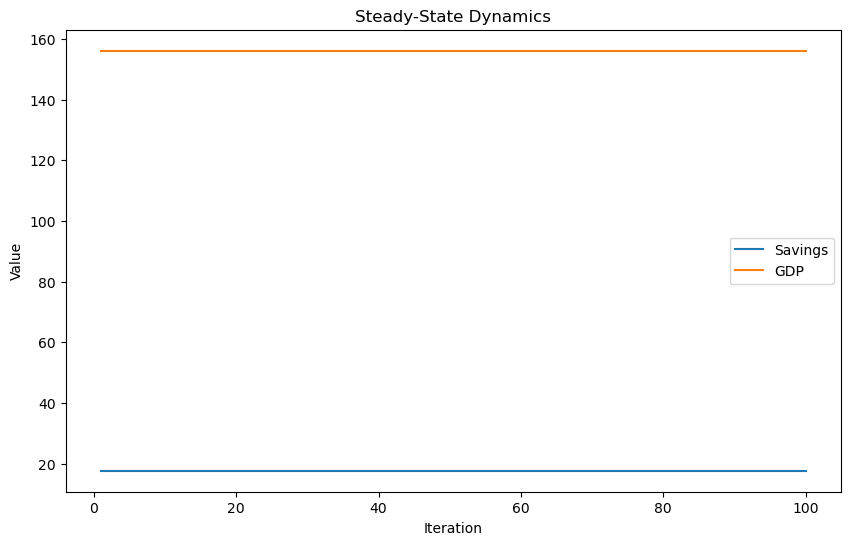

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# ---Parameters---
d = 1.01        # Population growth rate is assumed to be 1%
a = 0.02        # Robot productivity growth rate is assumed to be 2%
alpha = 0.33    # Capital share in production function, in Cobb-Douglas this is the power of Capital
delta = 0.96    # Discount Factor  
t_L = 0.2       # Tax rate on labor income
t_K = 0.2       # Tax rate on capital income

# ----- Functions-----
def production_function(K, L, P):
    """
    Cobb-Douglas production function : Y = K^alpha * (L+P)^(1-alpha)
    """
    return K**alpha * ( L + P)**(1 - alpha) 
def wage(Y, L, P):
    """
    Wage: w = (1-alpha) * Y / (L+P)
    """
    return (1-alpha) * Y / ( L + P )

def return_to_capital(Y, K):
    """
    Return to capital: r = alpha * Y / K
    """
    return alpha * Y / K

def solve_steady_state(d, a, alpha, delta, t_L, t_K):
    """
    Solve for the steady-state values of GDP, consumption, savings, and pensions.
    """
    # Initial guesses for capital and labor
    K = 100
    L = 100
    P = 50  # Initial level of robots

    # Iterative process to find steady-state values
    for i in range(100):
        Y = production_function(K, L, P)
        w = wage(Y, L, P)
        r = return_to_capital(Y, K)

        # Household decisions
        S = delta * (1 - t_L) * w * L
        C_y = (1 - t_L) * w * L - S
        C_e = (1 + (1 - t_K) * r) * S

        # Update capital and robot levels
        K = S
        P = P * (1 + a)

        # Print iteration results
        print(f"Iteration {i + 1}: GDP = {Y:.2f}, Savings = {S:.2f}, Consumption (young) = {C_y:.2f}, Consumption (elderly) = {C_e:.2f}")

    return Y, S, C_y, C_e

# --- Run the steady-state solver ---
Y, S, C_y, C_e = solve_steady_state(d, a, alpha, delta, t_L, t_K)

# --- Plot the results ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), [S for _ in range(100)], label="Savings")
plt.plot(range(1, 101), [Y for _ in range(100)], label="GDP")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.title("Steady-State Dynamics")
plt.show()

